In [12]:
# esse módulo vai ser usado para pegar os dados do mercado financeiro de ações
import yfinance as yf # pip install yfinance

# esse módulo vai ser usado para manipular os dados (pd.Series)
import pandas as pd # pip install pandas

In [2]:
# arbitrando ações desejadas
acoes = ["PETR3.SA", "VALE3.SA", "EMBR3.SA"]
# acoes = ["AAPL.US", "V.US", "BO.US"]

In [3]:
# buscando dados de cotações diárias
cotacoes = yf.download(acoes, start="2020-01-01", end="2024-05-24")
print(cotacoes)

[*********************100%%**********************]  3 of 3 completed

Price       Adj Close                            Close                        \
Ticker       EMBR3.SA   PETR3.SA   VALE3.SA   EMBR3.SA   PETR3.SA   VALE3.SA   
Date                                                                           
2020-01-02  20.200001  12.028614  36.413357  20.200001  32.799999  54.330002   
2020-01-03  20.410000  11.731565  36.145267  20.410000  31.990000  53.930000   
2020-01-06  20.379999  12.112962  35.930790  20.379999  33.029999  53.610001   
2020-01-07  20.500000  11.947937  36.192181  20.500000  32.580002  54.000000   
2020-01-08  20.330000  11.753572  36.198879  20.330000  32.049999  54.009998   
...               ...        ...        ...        ...        ...        ...   
2024-05-17  39.560001  38.570000  66.180000  39.560001  38.570000  66.180000   
2024-05-20  38.880001  38.700001  66.150002  38.880001  38.700001  66.150002   
2024-05-21  39.500000  38.410000  65.959999  39.500000  38.410000  65.959999   
2024-05-22  38.689999  38.770000  65.440

In [4]:
# mostrando apenas as cinco primeiras linhas da coluna Adj Close
print(cotacoes.loc[:, "Adj Close"].head(5))

Ticker       EMBR3.SA   PETR3.SA   VALE3.SA
Date                                       
2020-01-02  20.200001  12.028614  36.413357
2020-01-03  20.410000  11.731565  36.145267
2020-01-06  20.379999  12.112962  35.930790
2020-01-07  20.500000  11.947937  36.192181
2020-01-08  20.330000  11.753572  36.198879


In [5]:
# guardando todas as linhas da coluna principal (Adj Close) em uma variável (cotacoes)
cotacoes = cotacoes.loc[:, "Adj Close"]
print(cotacoes)

Ticker       EMBR3.SA   PETR3.SA   VALE3.SA
Date                                       
2020-01-02  20.200001  12.028614  36.413357
2020-01-03  20.410000  11.731565  36.145267
2020-01-06  20.379999  12.112962  35.930790
2020-01-07  20.500000  11.947937  36.192181
2020-01-08  20.330000  11.753572  36.198879
...               ...        ...        ...
2024-05-17  39.560001  38.570000  66.180000
2024-05-20  38.880001  38.700001  66.150002
2024-05-21  39.500000  38.410000  65.959999
2024-05-22  38.689999  38.770000  65.440002
2024-05-23  37.970001  38.439999  65.050003

[1092 rows x 3 columns]


In [6]:
# pra se obter as variações percentuais de um DataFrame, basta usar o método pct_change()
# o método .dropna() é usado para remover os valores NaN (Not a Number) do DataFrame

# print(variacoes.pct_change())
# print(variacoes.pct_change().dropna())
variacoes = cotacoes.pct_change().dropna()
print(variacoes)

Ticker      EMBR3.SA  PETR3.SA  VALE3.SA
Date                                    
2020-01-03  0.010396 -0.024695 -0.007362
2020-01-06 -0.001470  0.032510 -0.005934
2020-01-07  0.005888 -0.013624  0.007275
2020-01-08 -0.008293 -0.016268  0.000185
2020-01-09 -0.006886  0.005616 -0.013146
...              ...       ...       ...
2024-05-17  0.023015 -0.018325  0.019565
2024-05-20 -0.017189  0.003371 -0.000453
2024-05-21  0.015946 -0.007494 -0.002872
2024-05-22 -0.020506  0.009373 -0.007884
2024-05-23 -0.018609 -0.008512 -0.005960

[1091 rows x 3 columns]


In [7]:
# checando o método mean() para obter a média de cada coluna (axis=0)
print(variacoes.mean(axis=0))

Ticker
EMBR3.SA    0.001168
PETR3.SA    0.001546
VALE3.SA    0.000831
dtype: float64


In [8]:
# guardando o resultado do método 'mean' em uma variável apropriadamente chamada de 
# 'retornos_medios'
retornos_medios = variacoes.mean(axis=0)
print(retornos_medios)

Ticker
EMBR3.SA    0.001168
PETR3.SA    0.001546
VALE3.SA    0.000831
dtype: float64


In [9]:
# checando o método cov() para obter a matriz de covariância
print(variacoes.cov())

Ticker    EMBR3.SA  PETR3.SA  VALE3.SA
Ticker                                
EMBR3.SA  0.001178  0.000388  0.000252
PETR3.SA  0.000388  0.000931  0.000370
VALE3.SA  0.000252  0.000370  0.000606


In [10]:
# guardando o resultado do método 'cov' em uma variável apropriadamente chamada de 'covariancias'
covariancias = variacoes.cov()
print(covariancias)

Ticker    EMBR3.SA  PETR3.SA  VALE3.SA
Ticker                                
EMBR3.SA  0.001178  0.000388  0.000252
PETR3.SA  0.000388  0.000931  0.000370
VALE3.SA  0.000252  0.000370  0.000606


In [13]:
# passo para cada ação nas carteiras geradas pela combinatória
passo = 1

# listas para armazenar os resultados de cada iteração
carteiras = []
retornos = []
riscos = []
fos = []

# criando a coleção de percentuais para a PETR3
colecao_petr = range(0, 100 + passo, passo)

# percorrendo seus elementos
for perc_petr in colecao_petr:

    # criando a coleção de percentuais para a VALE3
    colecao_vale = range(0, 100 + passo - perc_petr, passo)

    # percorrendo seus elementos (para cada elemento da coleção perc_petr)
    for perc_vale in colecao_vale:

        # calculando o percentual RESTANTE para a EMBR3
        perc_embr = 100 - perc_petr - perc_vale 

        # criando a carteira com seus percentuais e convertendo para um 'pd.Series'
        # perceber, que dividir um 'Series' por um 'int' retorna um Series com cada 
        # elemento dividido pelo 'int'
        # enquanto NÃO é possível dividir uma lista por um int (retorna erro)
        carteira = pd.Series([perc_petr, perc_vale, perc_embr], index=acoes) / 100
        carteiras.append(carteira)

        # calcula o risco e armazena na lista de riscos
        risco = carteira.dot(covariancias).dot(carteira)
        riscos.append(risco)

        # calcula o retorno e armazena na lista de retornos
        retorno = carteira.dot(retornos_medios)
        retornos.append(retorno)

        # calcula a função objetivo e armazena na lista de funções objetivo
        fo = retorno / risco
        fos.append(fo)

In [14]:
# imprimindo as três primeiras carteiras armazenadas na lista
print(carteiras[:3])

[PETR3.SA    0.0
VALE3.SA    0.0
EMBR3.SA    1.0
dtype: float64, PETR3.SA    0.00
VALE3.SA    0.01
EMBR3.SA    0.99
dtype: float64, PETR3.SA    0.00
VALE3.SA    0.02
EMBR3.SA    0.98
dtype: float64]


In [15]:
# TRANSFORMANDO E IMPRIMINDO a lista de Series (carteiras) em uma estrutura tabular (DataFrame)
print(pd.DataFrame(carteiras))

      PETR3.SA  VALE3.SA  EMBR3.SA
0         0.00      0.00      1.00
1         0.00      0.01      0.99
2         0.00      0.02      0.98
3         0.00      0.03      0.97
4         0.00      0.04      0.96
...        ...       ...       ...
5146      0.98      0.01      0.01
5147      0.98      0.02      0.00
5148      0.99      0.00      0.01
5149      0.99      0.01      0.00
5150      1.00      0.00      0.00

[5151 rows x 3 columns]


In [16]:
# importa a biblioteca 'matplotlib.pyplot' para plotar gráficos
import matplotlib.pyplot as plt

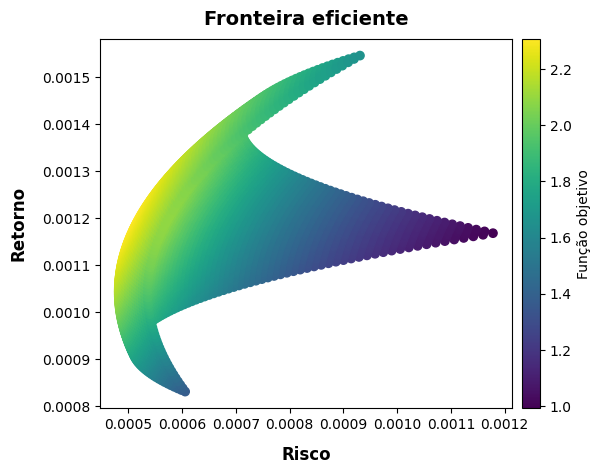

In [17]:
# plotando todos os pontos retornos/riscos
# plt.scatter(riscos, retornos)
plt.scatter(riscos, retornos, c=fos, cmap='viridis')

# cria uma barra de cores para representar a função objetivo
plt.colorbar(label='Função objetivo', orientation='vertical', pad=0.02)

# cria um texto para o eixo 'x'
plt.xlabel(xlabel='Risco', fontdict={'fontsize': 12, 'fontweight': 'bold'}, labelpad=10, loc='center')

# cria um texto para o eixo 'y'
plt.ylabel(ylabel='Retorno', fontdict={'fontsize': 12, 'fontweight': 'bold'}, labelpad=10, loc='center')

# cria um título para o gráfico
plt.title(label=f"Fronteira eficiente", fontdict={'fontsize': 14, 'fontweight': 'bold'}, loc='center', pad=10)

# exibe o gráfico
plt.show()

In [18]:
# 'fos' é uma lista de floats
print(fos[:3])

[0.991795005556981, 1.0046250578074112, 1.0176404424150123]


In [19]:
# métodos disponíveis para uma lista (fos)
# NÃO existe nenhum método que retorne o índice do maior valor ou menor valor (PARA LISTAS!!!)
print(dir(fos))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [20]:
# enquanto, o objeto 'pd.Series' possui o método 'idxmax' e 'idxmin' para retornar o índice do maior e menor valor, respectivamente
print(dir(pd.Series))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfl

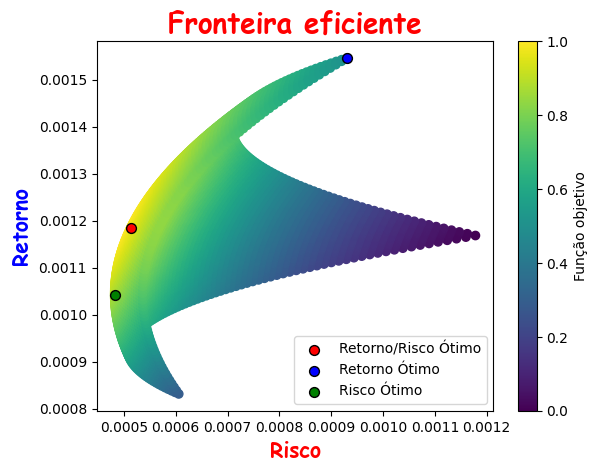

In [21]:
# plotando todos os pontos retornos/riscos
plt.scatter(riscos, retornos, c=fos, cmap='viridis')

# --------------------------------------------------------------------------------------------
# transformando a lista 'fos' em um 'pd.Series' e guardando na variável 'fos_series'
fos_series = pd.Series(fos)

# usando o método 'idxmax' no objeto (pd.Series) dentro da variável 'fos_series' 
# para retornar o índice do maior valor dentro do 'pd.Series'
indice_maior_fo = fos_series.idxmax()

# obtendo o valor de retorno e risco associados ao índice do maior valor da função objetivo
retorno = retornos[indice_maior_fo]
risco = riscos[indice_maior_fo]

# plotando o ponto de maior retorno/risco
plt.scatter(risco, retorno, c='red', s=50, edgecolors='black', label="Retorno/Risco Ótimo")
# --------------------------------------------------------------------------------------------


# --------------------------------------------------------------------------------------------
# transformando a lista 'retornos' em um 'pd.Series' e guardando na variável 'retornos_series'
retornos_series = pd.Series(retornos)

# usando o método 'idxmax' no objeto (pd.Series) dentro da variável 'retornos_series' 
# para retornar o índice do maior valor dentro do 'pd.Series'
indice_maior_retorno = retornos_series.idxmax()

# obtendo o valor de retorno e risco associados ao índice do maior valor de retorno
retorno = retornos[indice_maior_retorno]
risco = riscos[indice_maior_retorno]

# plotando o ponto de maior retorno
plt.scatter(risco, retorno, c='blue', s=50, edgecolors='black', label="Retorno Ótimo")
# --------------------------------------------------------------------------------------------



# --------------------------------------------------------------------------------------------
# transformando a lista 'fos' em um 'pd.Series' e guardando na variável 'fos_series'
riscos_series = pd.Series(riscos)

# usando o método 'idxmin' no objeto (pd.Series) dentro da variável 'riscos_series' 
# para retornar o índice do menor valor dentro do 'pd.Series'
indice_menor_risco = riscos_series.idxmin()

# obtendo o valor de retorno e risco associados ao índice do menor valor de risco
retorno = retornos[indice_menor_risco]
risco = riscos[indice_menor_risco]

# plotando o ponto de menor risco
plt.scatter(risco, retorno, c='green', s=50, edgecolors='black', label="Risco Ótimo")
# --------------------------------------------------------------------------------------------

# mostra a barra de cores
plt.colorbar(label='Função objetivo')

# formata e mostra o rótulo do eixo x
plt.xlabel('Risco', fontsize=15, fontweight='bold', color='red', fontname='Comic Sans MS')

# formata e mostra o rótulo do eixo y
plt.ylabel('Retorno', fontsize=15, fontweight='bold', color='blue', fontname='Comic Sans MS')

# formata e mostra o título do gráfico
plt.title(f"Fronteira eficiente", fontsize=20, fontweight='bold', color='red', 
          fontname='Comic Sans MS', loc='center')

# mostra a legenda
plt.legend()

# exibe o gráfico com todas as plotagens e formatações
plt.show()

In [22]:
# mostrando a carteira associada com o índice de maior valor da função objetivo
carteiras[indice_maior_fo]

PETR3.SA    0.39
VALE3.SA    0.39
EMBR3.SA    0.22
dtype: float64

In [23]:
# mostrando a carteira associada com o índice de maior valor de retorno
carteiras[indice_maior_retorno]

PETR3.SA    1.0
VALE3.SA    0.0
EMBR3.SA    0.0
dtype: float64

In [24]:
# mostrando a carteira associada com o índice de menor valor de risco
carteiras[indice_menor_risco]

PETR3.SA    0.19
VALE3.SA    0.59
EMBR3.SA    0.22
dtype: float64